# Activity 07 - Linear models

***
##### CS 434 - Dating Mining and Machine Learning
##### Oregon State University-Cascades
***

# Load packages

In [0]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from scipy.stats.stats import pearsonr, spearmanr
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# Dataset

[Communities and Crime Data Set](http://archive.ics.uci.edu/ml/datasets/communities+and+crime)

Predict *Violent Crimes Per Population* for communities within the United States. The data combines socio-economic data from the 1990 US Census, law enforcement data from the 1990 US LEMAS survey, and crime data from the 1995 FBI UCR.

**Note**: this data is already standardized.


### Attributes

* **state:** US state (by number) - not counted as predictive above, but if considered, should be consided nominal (nominal)
* **county:** numeric code for county - not predictive, and many missing values (numeric)
* **community:** numeric code for community - not predictive and many missing values (numeric)
* **communityname:** community name - not predictive - for information only (string)
* **fold:** fold number for non-random 10 fold cross validation, potentially useful for debugging, paired tests - not predictive (numeric)
* **population:** population for community:** (numeric - decimal)
* **householdsize:** mean people per household (numeric - decimal)
* **racepctblack:** percentage of population that is african american (numeric - decimal)
* **racePctWhite:** percentage of population that is caucasian (numeric - decimal)
* **racePctAsian:** percentage of population that is of asian heritage (numeric - decimal)
* **racePctHisp:** percentage of population that is of hispanic heritage (numeric - decimal)
* **agePct12t21:** percentage of population that is 12-21 in age (numeric - decimal)
* **agePct12t29:** percentage of population that is 12-29 in age (numeric - decimal)
* **agePct16t24:** percentage of population that is 16-24 in age (numeric - decimal)
* **agePct65up:** percentage of population that is 65 and over in age (numeric - decimal)
* **numbUrban:** number of people living in areas classified as urban (numeric - decimal)
* **pctUrban:** percentage of people living in areas classified as urban (numeric - decimal)
* **medIncome:** median household income (numeric - decimal)
* **pctWWage:** percentage of households with wage or salary income in 1989 (numeric - decimal)
* **pctWFarmSelf:** percentage of households with farm or self employment income in 1989 (numeric - decimal)
* **pctWInvInc:** percentage of households with investment / rent income in 1989 (numeric - decimal)
* **pctWSocSec:** percentage of households with social security income in 1989 (numeric - decimal)
* **pctWPubAsst:** percentage of households with public assistance income in 1989 (numeric - decimal)
* **pctWRetire:** percentage of households with retirement income in 1989 (numeric - decimal)
* **medFamInc:** median family income (differs from household income for non-family households) (numeric - decimal)
* **perCapInc:** per capita income (numeric - decimal)
* **whitePerCap:** per capita income for caucasians (numeric - decimal)
* **blackPerCap:** per capita income for african americans (numeric - decimal)
* **indianPerCap:** per capita income for native americans (numeric - decimal)
* **AsianPerCap:** per capita income for people with asian heritage (numeric - decimal)
* **OtherPerCap:** per capita income for people with 'other' heritage (numeric - decimal)
* **HispPerCap:** per capita income for people with hispanic heritage (numeric - decimal)
* **NumUnderPov:** number of people under the poverty level (numeric - decimal)
* **PctPopUnderPov:** percentage of people under the poverty level (numeric - decimal)
* **PctLess9thGrade:** percentage of people 25 and over with less than a 9th grade education (numeric - decimal)
* **PctNotHSGrad:** percentage of people 25 and over that are not high school graduates (numeric - decimal)
* **PctBSorMore:** percentage of people 25 and over with a bachelors degree or higher education (numeric - decimal)
* **PctUnemployed:** percentage of people 16 and over, in the labor force, and unemployed (numeric - decimal)
* **PctEmploy:** percentage of people 16 and over who are employed (numeric - decimal)
* **PctEmplManu:** percentage of people 16 and over who are employed in manufacturing (numeric - decimal)
* **PctEmplProfServ:** percentage of people 16 and over who are employed in professional services (numeric - decimal)
* **PctOccupManu:** percentage of people 16 and over who are employed in manufacturing (numeric - decimal) ########
* **PctOccupMgmtProf:** percentage of people 16 and over who are employed in management or professional occupations (numeric - decimal)
* **MalePctDivorce:** percentage of males who are divorced (numeric - decimal)
* **MalePctNevMarr:** percentage of males who have never married (numeric - decimal)
* **FemalePctDiv:** percentage of females who are divorced (numeric - decimal)
* **TotalPctDiv:** percentage of population who are divorced (numeric - decimal)
* **PersPerFam:** mean number of people per family (numeric - decimal)
* **PctFam2Par:** percentage of families (with kids) that are headed by two parents (numeric - decimal)
* **PctKids2Par:** percentage of kids in family housing with two parents (numeric - decimal)
* **PctYoungKids2Par:** percent of kids 4 and under in two parent households (numeric - decimal)
* **PctTeen2Par:** percent of kids age 12-17 in two parent households (numeric - decimal)
* **PctWorkMomYoungKids:** percentage of moms of kids 6 and under in labor force (numeric - decimal)
* **PctWorkMom:** percentage of moms of kids under 18 in labor force (numeric - decimal)
* **NumIlleg:** number of kids born to never married (numeric - decimal)
* **PctIlleg:** percentage of kids born to never married (numeric - decimal)
* **NumImmig:** total number of people known to be foreign born (numeric - decimal)
* **PctImmigRecent:** percentage of _immigrants_ who immigated within last 3 years (numeric - decimal)
* **PctImmigRec5:** percentage of _immigrants_ who immigated within last 5 years (numeric - decimal)
* **PctImmigRec8:** percentage of _immigrants_ who immigated within last 8 years (numeric - decimal)
* **PctImmigRec10:** percentage of _immigrants_ who immigated within last 10 years (numeric - decimal)
* **PctRecentImmig:** percent of _population_ who have immigrated within the last 3 years (numeric - decimal)
* **PctRecImmig5:** percent of _population_ who have immigrated within the last 5 years (numeric - decimal)
* **PctRecImmig8:** percent of _population_ who have immigrated within the last 8 years (numeric - decimal)
* **PctRecImmig10:** percent of _population_ who have immigrated within the last 10 years (numeric - decimal)
* **PctSpeakEnglOnly:** percent of people who speak only English (numeric - decimal)
* **PctNotSpeakEnglWell:** percent of people who do not speak English well (numeric - decimal)
* **PctLargHouseFam:** percent of family households that are large (6 or more) (numeric - decimal)
* **PctLargHouseOccup:** percent of all occupied households that are large (6 or more people) (numeric - decimal)
* **PersPerOccupHous:** mean persons per household (numeric - decimal)
* **PersPerOwnOccHous:** mean persons per owner occupied household (numeric - decimal)
* **PersPerRentOccHous:** mean persons per rental household (numeric - decimal)
* **PctPersOwnOccup:** percent of people in owner occupied households (numeric - decimal)
* **PctPersDenseHous:** percent of persons in dense housing (more than 1 person per room) (numeric - decimal)
* **PctHousLess3BR:** percent of housing units with less than 3 bedrooms (numeric - decimal)
* **MedNumBR:** median number of bedrooms (numeric - decimal)
* **HousVacant:** number of vacant households (numeric - decimal)
* **PctHousOccup:** percent of housing occupied (numeric - decimal)
* **PctHousOwnOcc:** percent of households owner occupied (numeric - decimal)
* **PctVacantBoarded:** percent of vacant housing that is boarded up (numeric - decimal)
* **PctVacMore6Mos:** percent of vacant housing that has been vacant more than 6 months (numeric - decimal)
* **MedYrHousBuilt:** median year housing units built (numeric - decimal)
* **PctHousNoPhone:** percent of occupied housing units without phone (in 1990, this was rare!) (numeric - decimal)
* **PctWOFullPlumb:** percent of housing without complete plumbing facilities (numeric - decimal)
* **OwnOccLowQuart:** owner occupied housing - lower quartile value (numeric - decimal)
* **OwnOccMedVal:** owner occupied housing - median value (numeric - decimal)
* **OwnOccHiQuart:** owner occupied housing - upper quartile value (numeric - decimal)
* **RentLowQ:** rental housing - lower quartile rent (numeric - decimal)
* **RentMedian:** rental housing - median rent (Census variable H32B from file STF1A) (numeric - decimal)
* **RentHighQ:** rental housing - upper quartile rent (numeric - decimal)
* **MedRent:** median gross rent (Census variable H43A from file STF3A - includes utilities) (numeric - decimal)
* **MedRentPctHousInc:** median gross rent as a percentage of household income (numeric - decimal)
* **MedOwnCostPctInc:** median owners cost as a percentage of household income - for owners with a mortgage (numeric - decimal)
* **MedOwnCostPctIncNoMtg:** median owners cost as a percentage of household income - for owners without a mortgage (numeric - decimal)
* **NumInShelters:** number of people in homeless shelters (numeric - decimal)
* **NumStreet:** number of homeless people counted in the street (numeric - decimal)
* **PctForeignBorn:** percent of people foreign born (numeric - decimal)
* **PctBornSameState:** percent of people born in the same state as currently living (numeric - decimal)
* **PctSameHouse85:** percent of people living in the same house as in 1985 (5 years before) (numeric - decimal)
* **PctSameCity85:** percent of people living in the same city as in 1985 (5 years before) (numeric - decimal)
* **PctSameState85:** percent of people living in the same state as in 1985 (5 years before) (numeric - decimal)
* **LemasSwornFT:** number of sworn full time police officers (numeric - decimal)
* **LemasSwFTPerPop:** sworn full time police officers per 100K population (numeric - decimal)
* **LemasSwFTFieldOps:** number of sworn full time police officers in field operations (on the street as opposed to administrative etc) (numeric - decimal)
* **LemasSwFTFieldPerPop:** sworn full time police officers in field operations (on the street as opposed to administrative etc) per 100K population (numeric - decimal)
* **LemasTotalReq:** total requests for police (numeric - decimal)
* **LemasTotReqPerPop:** total requests for police per 100K popuation (numeric - decimal)
* **PolicReqPerOffic:** total requests for police per police officer (numeric - decimal)
* **PolicPerPop:** police officers per 100K population (numeric - decimal)
* **RacialMatchCommPol:** a measure of the racial match between the community and the police force. High values indicate proportions in community and police force are similar (numeric - decimal)
* **PctPolicWhite:** percent of police that are caucasian (numeric - decimal)
* **PctPolicBlack:** percent of police that are african american (numeric - decimal)
* **PctPolicHisp:** percent of police that are hispanic (numeric - decimal)
* **PctPolicAsian:** percent of police that are asian (numeric - decimal)
* **PctPolicMinor:** percent of police that are minority of any kind (numeric - decimal)
* **OfficAssgnDrugUnits:** number of officers assigned to special drug units (numeric - decimal)
* **NumKindsDrugsSeiz:** number of different kinds of drugs seized (numeric - decimal)
* **PolicAveOTWorked:** police average overtime worked (numeric - decimal)
* **LandArea:** land area in square miles (numeric - decimal)
* **PopDens:** population density in persons per square mile (numeric - decimal)
* **PctUsePubTrans:** percent of people using public transit for commuting (numeric - decimal)
* **PolicCars:** number of police cars (numeric - decimal)
* **PolicOperBudg:** police operating budget (numeric - decimal)
* **LemasPctPolicOnPatr:** percent of sworn full time police officers on patrol (numeric - decimal)
* **LemasGangUnitDeploy:** gang unit deployed (numeric - decimal - but really ordinal - 0 means NO, 1 means YES, 0.5 means Part Time)
* **LemasPctOfficDrugUn:** percent of officers assigned to drug units (numeric - decimal)
* **PolicBudgPerPop:** police operating budget per population (numeric - decimal)
* **ViolentCrimesPerPop:** total number of violent crimes per 100K popuation (numeric - decimal) GOAL attribute (to be predicted)

### GOAL attribute (to be predicted)

* **ViolentCrimesPerPop**: total number of violent crimes per 100K popuation (numeric - decimal) 

### Data url and column header

In [0]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data'
header = ['state','county','community','communityname string','fold','population','householdsize','racepctblack','racePctWhite','racePctAsian','racePctHisp','agePct12t21','agePct12t29','agePct16t24','agePct65up','numbUrban','pctUrban','medIncome','pctWWage','pctWFarmSelf','pctWInvInc','pctWSocSec','pctWPubAsst','pctWRetire','medFamInc','perCapInc','whitePerCap','blackPerCap','indianPerCap','AsianPerCap','OtherPerCap','HispPerCap','NumUnderPov','PctPopUnderPov','PctLess9thGrade','PctNotHSGrad','PctBSorMore','PctUnemployed','PctEmploy','PctEmplManu','PctEmplProfServ','PctOccupManu','PctOccupMgmtProf','MalePctDivorce','MalePctNevMarr','FemalePctDiv','TotalPctDiv','PersPerFam','PctFam2Par','PctKids2Par','PctYoungKids2Par','PctTeen2Par','PctWorkMomYoungKids','PctWorkMom','NumIlleg','PctIlleg','NumImmig','PctImmigRecent','PctImmigRec5','PctImmigRec8','PctImmigRec10','PctRecentImmig','PctRecImmig5','PctRecImmig8','PctRecImmig10','PctSpeakEnglOnly','PctNotSpeakEnglWell','PctLargHouseFam','PctLargHouseOccup','PersPerOccupHous','PersPerOwnOccHous','PersPerRentOccHous','PctPersOwnOccup','PctPersDenseHous','PctHousLess3BR','MedNumBR','HousVacant','PctHousOccup','PctHousOwnOcc','PctVacantBoarded','PctVacMore6Mos','MedYrHousBuilt','PctHousNoPhone','PctWOFullPlumb','OwnOccLowQuart','OwnOccMedVal','OwnOccHiQuart','RentLowQ','RentMedian','RentHighQ','MedRent','MedRentPctHousInc','MedOwnCostPctInc','MedOwnCostPctIncNoMtg','NumInShelters','NumStreet','PctForeignBorn','PctBornSameState','PctSameHouse85','PctSameCity85','PctSameState85','LemasSwornFT','LemasSwFTPerPop','LemasSwFTFieldOps','LemasSwFTFieldPerPop','LemasTotalReq','LemasTotReqPerPop','PolicReqPerOffic','PolicPerPop','RacialMatchCommPol','PctPolicWhite','PctPolicBlack','PctPolicHisp','PctPolicAsian','PctPolicMinor','OfficAssgnDrugUnits','NumKindsDrugsSeiz','PolicAveOTWorked','LandArea','PopDens','PctUsePubTrans','PolicCars','PolicOperBudg','LemasPctPolicOnPatr','LemasGangUnitDeploy','LemasPctOfficDrugUn','PolicBudgPerPop','ViolentCrimesPerPop']

*** 
# Exercise #1 - Load data
*** 

1.1 Load data and display. Read in `'?'` as `NaN`.

In [250]:
# load the dataset into a dataframe
df = pd.read_csv(url, header=None)
df.columns = header
df

,state,county,community,communityname string,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,...,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.0,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,0.23,...,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.00,0.12,0.42,0.50,0.51,0.64,0.03,0.13,0.96,0.17,0.06,0.18,0.44,0.13,0.94,0.93,0.03,0.07,0.1,0.07,0.02,0.57,0.29,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,...,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.00,0.21,0.50,0.34,0.60,0.52,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,...,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.00,0.14,0.49,0.54,0.67,0.56,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.0,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,0.36,...,0.70,0.77,0.89,0.63,0.51,0.47,0.00,0.00,0.19,0.30,0.73,0.64,0.65,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,0.02,0.9,0.50,0.72,0.16,0.68,0.44,0.11,0.71,0.46,0.43,0.41,0.28,0.00,0.74,0.51,0.48,0.00,0.06,0.25,0.30,0.33,0.12,0.65,0.67,...,0.36,0.38,0.38,0.22,0.51,0.21,0.00,0.00,0.11,0.72,0.64,0.61,0.53,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,0.03,1.0,0.42,0.74,0.14,0.64,0.30,0.06,0.46,0.41,0.49,0.50,0.27,0.00,0.16,0.36,0.52,0.01,0.16,0.08,0.11,0.65,0.12,0.71,0.17,...,0.39,0.41,0.41,0.50,0.48,0.39,0.00,0.00,0.22,0.28,0.34,0.48,0.39,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,0.06,1.0,0.28,0.76,0.10,0.30,0.26,0.37,0.48,0.24,0.18,0.20,0.26,0.18,0.20,0.23,0.26,0.04,0.32,0.33,0.37,0.22,0.24,0.77,0.10,...,0.54,0.61,0.54,0.69,0.67,0.31,0.01,0.00,0.53,0.25,0.17,0.10,0.00,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,0.17,1.0,0.31,0.47,0.17,0.45,0.58,0.48,0.57,0.35,0.31,0.34,0.25,0.1

##### 1.2 Save the `'communityname string'`column as `df_community`.

In [251]:
# save 'communityname string' as df_community
df_community = df['communityname string']
df_community

0              Lakewoodcity
1               Tukwilacity
2              Aberdeentown
3       Willingborotownship
4         Bethlehemtownship
               ...         
1989      TempleTerracecity
1990            Seasidecity
1991          Waterburytown
1992            Walthamcity
1993            Ontariocity
Name: communityname string, Length: 1994, dtype: object

> We'll use the `'communityname string'` later to look at results, but we don't need it for learning.

##### 1.3 Drop `'communityname string'` and the other four non-descriptive columns

In [252]:
# drop 5 non-descriptive columns
df.drop(['state',	'county',	'community',	'communityname string',	'fold'],axis=1, inplace=True)
df

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,...,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.0,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,0.23,0.41,0.25,0.52,0.68,0.40,...,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.00,0.12,0.42,0.50,0.51,0.64,0.03,0.13,0.96,0.17,0.06,0.18,0.44,0.13,0.94,0.93,0.03,0.07,0.1,0.07,0.02,0.57,0.29,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,0.15,0.42,0.36,1.00,0.63,...,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.00,0.21,0.50,0.34,0.60,0.52,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,0.29,0.49,0.32,0.63,0.41,...,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.00,0.14,0.49,0.54,0.67,0.56,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.0,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,0.36,0.45,0.37,0.39,0.34,0.45,...,0.70,0.77,0.89,0.63,0.51,0.47,0.00,0.00,0.19,0.30,0.73,0.64,0.65,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,0.02,0.9,0.50,0.72,0.16,0.68,0.44,0.11,0.71,0.46,0.43,0.41,0.28,0.00,0.74,0.51,0.48,0.00,0.06,0.25,0.30,0.33,0.12,0.65,0.67,0.38,0.42,0.46,0.22,0.27,...,0.36,0.38,0.38,0.22,0.51,0.21,0.00,0.00,0.11,0.72,0.64,0.61,0.53,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,0.03,1.0,0.42,0.74,0.14,0.64,0.30,0.06,0.46,0.41,0.49,0.50,0.27,0.00,0.16,0.36,0.52,0.01,0.16,0.08,0.11,0.65,0.12,0.71,0.17,0.68,0.14,0.70,0.39,0.41,...,0.39,0.41,0.41,0.50,0.48,0.39,0.00,0.00,0.22,0.28,0.34,0.48,0.39,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,0.06,1.0,0.28,0.76,0.10,0.30,0.26,0.37,0.48,0.24,0.18,0.20,0.26,0.18,0.20,0.23,0.26,0.04,0.32,0.33,0.37,0.22,0.24,0.77,0.10,0.41,0.22,0.24,0.42,0.75,...,0.54,0.61,0.54,0.69,0.67,0.31,0.01,0.00,0.53,0.25,0.17,0.10,0.00,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,0.17,1.0,0.31,0.47,0.17,0.45,0.58,0.48,0.57,0.35,0.31,0.34,0.25,0.19,

##### 1.4 Count the total number of missing values

In [253]:
# count the number of missing values 
df.isin(['?']).sum(axis=0).sum()


36851

##### 1.5 Drop columns that contain `NaN`

In [254]:
# drop columns with NaN values
df = df.drop(columns=df.columns[(df == '?').any()])
df

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,...,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.0,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,0.23,0.41,0.25,0.52,0.68,0.40,0.75,...,0.06,0.14,0.13,0.33,0.39,0.28,0.55,0.09,0.51,0.5,0.21,0.71,0.52,0.05,0.26,0.65,0.14,0.06,0.22,0.19,0.18,0.36,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.00,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,0.15,0.42,0.36,1.00,0.63,0.91,...,0.10,0.16,0.10,0.17,0.29,0.17,0.26,0.20,0.82,0.0,0.02,0.79,0.24,0.02,0.25,0.65,0.16,0.00,0.21,0.20,0.21,0.42,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.00,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,0.29,0.49,0.32,0.63,0.41,0.71,...,0.04,0.20,0.20,0.46,0.52,0.43,0.42,0.15,0.51,0.5,0.01,0.86,0.41,0.29,0.30,0.52,0.47,0.45,0.18,0.17,0.16,0.27,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.00,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.0,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,0.36,0.45,0.37,0.39,0.34,0.45,0.49,...,0.08,0.56,0.62,0.85,0.77,1.00,0.94,0.12,0.01,0.5,0.01,0.97,0.96,0.60,0.47,0.52,0.11,0.11,0.24,0.21,0.19,0.75,0.70,0.77,0.89,0.63,0.51,0.47,0.00,0.00,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,0.02,0.9,0.50,0.72,0.16,0.68,0.44,0.11,0.71,0.46,0.43,0.41,0.28,0.00,0.74,0.48,0.00,0.06,0.25,0.30,0.33,0.12,0.65,0.67,0.38,0.42,0.46,0.22,0.27,0.20,...,0.05,0.16,0.19,0.59,0.60,0.37,0.89,0.02,0.19,0.5,0.01,0.89,0.87,0.04,0.55,0.73,0.05,0.14,0.31,0.31,0.30,0.40,0.36,0.38,0.38,0.22,0.51,0.21,0.00,0.00,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,0.03,1.0,0.42,0.74,0.14,0.64,0.30,0.06,0.46,0.41,0.49,0.50,0.27,0.00,0.16,0.52,0.01,0.16,0.08,0.11,0.65,0.12,0.71,0.17,0.68,0.14,0.70,0.39,0.41,0.59,...,0.09,0.09,0.10,0.41,0.43,0.40,0.55,0.10,0.49,0.5,0.02,0.75,0.55,0.00,0.21,0.79,0.07,0.09,0.20,0.22,0.27,0.45,0.39,0.41,0.41,0.50,0.48,0.39,0.00,0.00,0.22,0.28,0.34,0.48,0.39,0.01,0.28,0.05,0.00,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,0.06,1.0,0.28,0.76,0.10,0.30,0.26,0.37,0.48,0.24,0.18,0.20,0.26,0.18,0.20,0.26,0.04,0.32,0.33,0.37,0.22,

##### 1.6 Confirm we have no missing values

In [255]:
# run to confirm there are no missing values
df.isin(['?']).sum(axis=0).sum()

0

*** 
# Exercise #2 - Train a `LinearRegression` model
*** 

In Exercises #2 and #3, we explore a linear `regression` model to a predict continuous value.

##### 2.1 Split data to X and y

In [256]:
# dependent variable y is 'ViolentCrimesPerPop'
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
print(X.shape, y.shape)

(1994, 99) (1994,)


##### 2.2 Construct a `LinearRegression` model

In [257]:
# create a LinearRegression() model
lr = LinearRegression()
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Self Check

```
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
```

##### 2.3 Run `k=10`-fold cross-validation

* Keep track of the `scores` for each fold and afterwards calulate the average `mean` and `std`.

* Keep track of the predictions in list `y_pred`

In [258]:
# k-fold CV
kfold = KFold(n_splits=10).split(X, y)
scores = []
y_pred = []
for k, (train, test) in enumerate(kfold):
    lr.fit(X[train], y[train])
    y_pred.extend(lr.predict(X[test]))
    score = lr.score(X[test], y[test])
    scores.append(score)
    print('Fold: %2d, Acc: %.3f' % (k+1, score))

numpy = np.array(scores)
print('mean: ', numpy.mean())
print('std: ', numpy.std())

Fold:  1, Acc: 0.601
Fold:  2, Acc: 0.638
Fold:  3, Acc: 0.618
Fold:  4, Acc: 0.660
Fold:  5, Acc: 0.704
Fold:  6, Acc: 0.727
Fold:  7, Acc: 0.706
Fold:  8, Acc: 0.637
Fold:  9, Acc: 0.677
Fold: 10, Acc: 0.572
mean:  0.6539611558180427
std:  0.04739181492579045


##### 2.4 Save the `'ViolentCrimesPerPop'` column from `df` as `y_true`.

In [259]:
# save 'ViolentCrimesPerPop' as y_true
y_true = df['ViolentCrimesPerPop']
y_true

0       0.20
1       0.67
2       0.43
3       0.12
4       0.03
        ... 
1989    0.09
1990    0.45
1991    0.23
1992    0.19
1993    0.48
Name: ViolentCrimesPerPop, Length: 1994, dtype: float64

##### 2.5 Confirm that `y_pred` and `y_true` are the same length

Use `==` to answer `True` or `False`.

In [260]:
# Confirm 'y_pred' and 'y_true' are same length (==)
print(len(y_true))
print(len(y_pred))
print(len(y_pred) == len(y_true))

1994
1994
True


> Don't continue to the next section until the above is `True`.

*** 
# Exercise #3 - Explore `LinearRegression` results
*** 

##### 3.1 Create a dataframe `df_results`

* `'Community'` $\rightarrow$ `df_community`  (from earlier)
* `'Actual'` $\rightarrow$ `y_true`
* `'Predicted'` $\rightarrow$ `y_pred`

In [261]:
# create df_results consisting of community name, actual, and predicted value
df_results = pd.DataFrame(df_community)
df_results['Actual'] = y_true
df_results['Predicted'] = y_pred
df_results

,communityname string,Actual,Predicted
0,Lakewoodcity,0.20,0.152479
1,Tukwilacity,0.67,0.264309
2,Aberdeentown,0.43,0.378494
3,Willingborotownship,0.12,0.312842
4,Bethlehemtownship,0.03,-0.045382
...,...,...,...
1989,TempleTerracecity,0.09,0.133419
1990,Seasidecity,0.45,0.512757
1991,Waterburytown,0.23,0.416275
1992,Walthamcity,0.19,0.162593


##### 3.2 Verify shape of `df_results`

In [262]:
# shape of df_results
df_results.shape

(1994, 3)

Self Check
> expecting `(1994, 3)`

##### 3.3 Describe `df_results`

In [263]:
# describe df_results
df_results.describe()

,Actual,Predicted
count,1994.000000,1994.000000
mean,0.237979,0.238121
std,0.232985,0.194341
min,0.000000,-0.126196
25%,0.070000,0.089903
50%,0.150000,0.191670
75%,0.330000,0.341579
max,1.000000,1.164930


##### 3.4 Scatterplot True vs. Predicted

Scatter plot True vs. Predicted
* add line `m, b = np.polyfit(x, y, 1)`
* add line `plt.plot(x, m*x + b, color='red')`
* where `x` and `y` are your `'y_true'` and `'y_pred'` series
* make sure to title your plot and axes

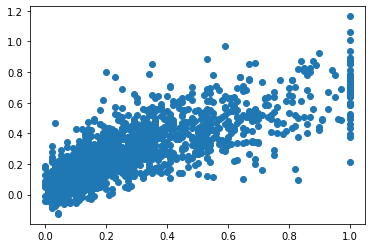

In [264]:
# make a scatter plot of 'true' vs 'predicted'
x = y_true
y = y_pred
plt.scatter(x,y)

##### 3.5 Make a pandas [bar chart](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html) of the `df_results.head(20)`

Show the actual vs. predicted values for the first 20 results.

* set the figure size to be wide, e.g., `figsize=(16,10)`
* use `plt.grid` to add grid lines (major tick, `'-'`, `0.5` width, `green`)

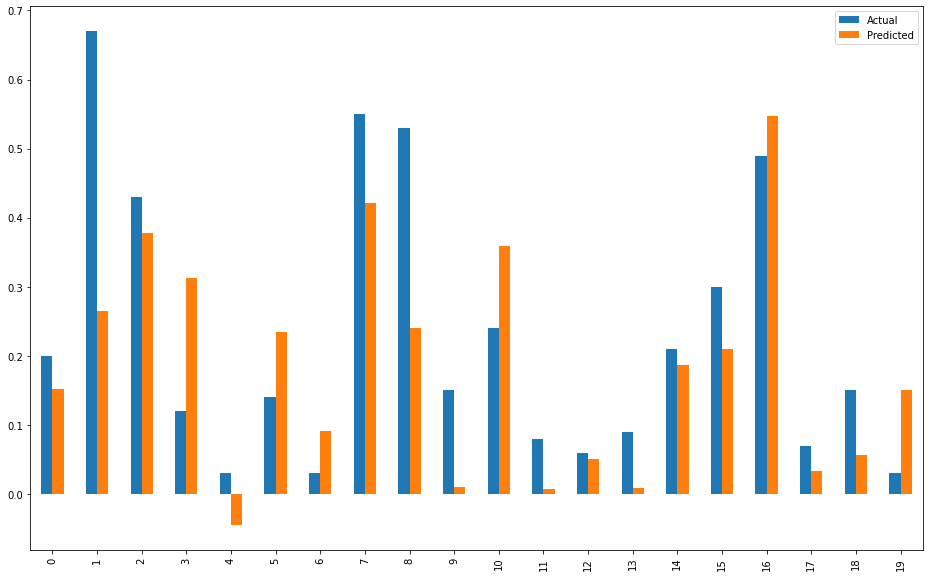

In [265]:
# bar graph of the first 20 examples
ax = df_results.head(20).plot.bar(figsize=(16,10))

Self Check
> There should be two series (blue=`'Actual'` and orange=`'Predicted'`
>
> For `index=0`
> * `actual = 0.2`
> * `pred = 0.152479`

*** 
# Exercise #4 - Train a `LogisticRegression` model
*** 

In Exercises #4 and #5, we explore a linear `classification` model to a predict class labels.

##### 4.1 Make a copy of `df` named `df_logr`

In [266]:
# make a copy df called df_logr
df_logr = df
df_logr

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,...,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.0,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,0.23,0.41,0.25,0.52,0.68,0.40,0.75,...,0.06,0.14,0.13,0.33,0.39,0.28,0.55,0.09,0.51,0.5,0.21,0.71,0.52,0.05,0.26,0.65,0.14,0.06,0.22,0.19,0.18,0.36,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.00,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,0.15,0.42,0.36,1.00,0.63,0.91,...,0.10,0.16,0.10,0.17,0.29,0.17,0.26,0.20,0.82,0.0,0.02,0.79,0.24,0.02,0.25,0.65,0.16,0.00,0.21,0.20,0.21,0.42,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.00,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,0.29,0.49,0.32,0.63,0.41,0.71,...,0.04,0.20,0.20,0.46,0.52,0.43,0.42,0.15,0.51,0.5,0.01,0.86,0.41,0.29,0.30,0.52,0.47,0.45,0.18,0.17,0.16,0.27,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.00,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.0,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,0.36,0.45,0.37,0.39,0.34,0.45,0.49,...,0.08,0.56,0.62,0.85,0.77,1.00,0.94,0.12,0.01,0.5,0.01,0.97,0.96,0.60,0.47,0.52,0.11,0.11,0.24,0.21,0.19,0.75,0.70,0.77,0.89,0.63,0.51,0.47,0.00,0.00,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,0.02,0.9,0.50,0.72,0.16,0.68,0.44,0.11,0.71,0.46,0.43,0.41,0.28,0.00,0.74,0.48,0.00,0.06,0.25,0.30,0.33,0.12,0.65,0.67,0.38,0.42,0.46,0.22,0.27,0.20,...,0.05,0.16,0.19,0.59,0.60,0.37,0.89,0.02,0.19,0.5,0.01,0.89,0.87,0.04,0.55,0.73,0.05,0.14,0.31,0.31,0.30,0.40,0.36,0.38,0.38,0.22,0.51,0.21,0.00,0.00,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,0.03,1.0,0.42,0.74,0.14,0.64,0.30,0.06,0.46,0.41,0.49,0.50,0.27,0.00,0.16,0.52,0.01,0.16,0.08,0.11,0.65,0.12,0.71,0.17,0.68,0.14,0.70,0.39,0.41,0.59,...,0.09,0.09,0.10,0.41,0.43,0.40,0.55,0.10,0.49,0.5,0.02,0.75,0.55,0.00,0.21,0.79,0.07,0.09,0.20,0.22,0.27,0.45,0.39,0.41,0.41,0.50,0.48,0.39,0.00,0.00,0.22,0.28,0.34,0.48,0.39,0.01,0.28,0.05,0.00,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,0.06,1.0,0.28,0.76,0.10,0.30,0.26,0.37,0.48,0.24,0.18,0.20,0.26,0.18,0.20,0.26,0.04,0.32,0.33,0.37,0.22,

> We'll use `df_logr` for the remainder of this notebook

* Keep track of the `scores` for each fold and calulate the average `mean` and `std`.

* Keep track of the predictions in list `y_pred`

##### 4.2 Discretize `'ViolentCrimesPerPop'` using `pd.cut(..)`

* Use [pandas cut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html) function to convert `'ViolentCrimesPerPop'` to discrete and convert to categorical values
* Use three bins (note: unequal width)
* Use bin ranges 
  * $[0, 0.25) \rightarrow $ `'low'`
  * $[0.25, 0.5) \rightarrow $ `'medium'`
  * $[0.5, 1.0] \rightarrow $ `'high'`

Note: you may need to extend the range in your bin description (e.g., $-0.01$ or $1.01$) to include boundary values of $0.0$ and $1.0$.

In [267]:
# discretize 'ViolentCrimesPerPop' and print df_logr
y_true_logr = y_true
y_true_logr = pd.cut(y_true_logr, [-0.01, 0.25, 0.5, 1.01], labels=["low", "medium", "high"])
df_logr['ViolentCrimesPerPop'] = y_true_logr
df_logr

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,...,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.0,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,0.23,0.41,0.25,0.52,0.68,0.40,0.75,...,0.06,0.14,0.13,0.33,0.39,0.28,0.55,0.09,0.51,0.5,0.21,0.71,0.52,0.05,0.26,0.65,0.14,0.06,0.22,0.19,0.18,0.36,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.00,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,low
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,0.15,0.42,0.36,1.00,0.63,0.91,...,0.10,0.16,0.10,0.17,0.29,0.17,0.26,0.20,0.82,0.0,0.02,0.79,0.24,0.02,0.25,0.65,0.16,0.00,0.21,0.20,0.21,0.42,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.00,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,high
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,0.29,0.49,0.32,0.63,0.41,0.71,...,0.04,0.20,0.20,0.46,0.52,0.43,0.42,0.15,0.51,0.5,0.01,0.86,0.41,0.29,0.30,0.52,0.47,0.45,0.18,0.17,0.16,0.27,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.00,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,medium
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.0,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,0.36,0.45,0.37,0.39,0.34,0.45,0.49,...,0.08,0.56,0.62,0.85,0.77,1.00,0.94,0.12,0.01,0.5,0.01,0.97,0.96,0.60,0.47,0.52,0.11,0.11,0.24,0.21,0.19,0.75,0.70,0.77,0.89,0.63,0.51,0.47,0.00,0.00,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,low
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,0.02,0.9,0.50,0.72,0.16,0.68,0.44,0.11,0.71,0.46,0.43,0.41,0.28,0.00,0.74,0.48,0.00,0.06,0.25,0.30,0.33,0.12,0.65,0.67,0.38,0.42,0.46,0.22,0.27,0.20,...,0.05,0.16,0.19,0.59,0.60,0.37,0.89,0.02,0.19,0.5,0.01,0.89,0.87,0.04,0.55,0.73,0.05,0.14,0.31,0.31,0.30,0.40,0.36,0.38,0.38,0.22,0.51,0.21,0.00,0.00,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,0.03,1.0,0.42,0.74,0.14,0.64,0.30,0.06,0.46,0.41,0.49,0.50,0.27,0.00,0.16,0.52,0.01,0.16,0.08,0.11,0.65,0.12,0.71,0.17,0.68,0.14,0.70,0.39,0.41,0.59,...,0.09,0.09,0.10,0.41,0.43,0.40,0.55,0.10,0.49,0.5,0.02,0.75,0.55,0.00,0.21,0.79,0.07,0.09,0.20,0.22,0.27,0.45,0.39,0.41,0.41,0.50,0.48,0.39,0.00,0.00,0.22,0.28,0.34,0.48,0.39,0.01,0.28,0.05,0.00,low
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,0.06,1.0,0.28,0.76,0.10,0.30,0.26,0.37,0.48,0.24,0.18,0.20,0.26,0.18,0.20,0.26,0.04,0.32,0.33,0.37,0.22,0.

##### 4.3 Split `df_logr` into `X` and `y`

In [268]:
# dependent variable y is 'ViolentCrimesPerPop'
X = df_logr.iloc[:, :-1].values
y = df_logr.iloc[:, -1].values
print(X.shape, y.shape)

(1994, 99) (1994,)


##### 4.4 Create a `LogisticRegression` classifier
* `random_state=1`
* `solver='lbfgs'`
* `max_iter=1000`

In [269]:
# create a LogisticRegression model
logr = LogisticRegression(random_state=1, solver='lbfgs', max_iter=1000)
logr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

##### 4.5 Run `k=10`-fold cross-validation

* Keep track of the `scores` for each fold and afterwards calulate the average mean and std.

* Keep track of the predictions in list `y_pred`

In [270]:
# k-fold CV
kfold = KFold(n_splits=10).split(X, y)
scores = []
y_pred = []
for k, (train, test) in enumerate(kfold):
    logr.fit(X[train], y[train])
    y_pred.extend(logr.predict(X[test]))
    score = logr.score(X[test], y[test])
    scores.append(score)
    print('Fold: %2d, Acc: %.3f' % (k+1, score))

numpy = np.array(scores)
print('mean: ', numpy.mean())
print('std: ', numpy.std())

Fold:  1, Acc: 0.805
Fold:  2, Acc: 0.745
Fold:  3, Acc: 0.725
Fold:  4, Acc: 0.765
Fold:  5, Acc: 0.784
Fold:  6, Acc: 0.794
Fold:  7, Acc: 0.774
Fold:  8, Acc: 0.749
Fold:  9, Acc: 0.774
Fold: 10, Acc: 0.784
mean:  0.7698291457286432
std:  0.023116109891190683


Self Check
> The `std` across folds is `+/- 0.023`.

*** 
# Exercise #5 - Explore results
*** 

##### 5.1 Save the `'ViolentCrimesPerPop'` column from `df_logr` as `y_true`.

In [271]:
y_true = df_logr['ViolentCrimesPerPop']
y_true

0          low
1         high
2       medium
3          low
4          low
         ...  
1989       low
1990    medium
1991       low
1992       low
1993    medium
Name: ViolentCrimesPerPop, Length: 1994, dtype: category
Categories (3, object): [low < medium < high]

> Ultimately `y_true` should remain unchanged, but for thoroughness we take it from our current dataframe `df_logr`.

##### 5.2 Calculate the accuracy between `y_true` and `y_pred`.

In [272]:
# print the accuracy score
accuracy = accuracy_score(y_true, y_pred)
print('Accuracy: %.3f' % accuracy)
print('Error: %.3f' % (1.-accuracy))

Accuracy: 0.770
Error: 0.230


##### 5.3 Graph the confusion matrix

[[ 161   33   83]
 [  17 1251   73]
 [  64  189  123]]


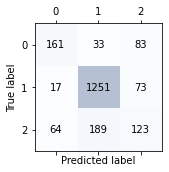

In [273]:
# graph a confusion matrix
confmat = confusion_matrix(y_true=y_true, y_pred=y_pred)
print(confmat)
# graph a confusion matrix
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

##### 5.4 Calculate precison, recall, and F$_1$ score

This is a multi-class classication problem (we have three class labels).
* Use `average='weighted'` as the multi-class strategy

In [274]:
# precision tp / (tp + fp)
precision = precision_score(y_true, y_pred, average='weighted')
print('Precision: %.3f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_true, y_pred, average='weighted')
print('Recall: %.3f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_true, y_pred, average='weighted')
print('F1 score: %.3f' % f1)

Precision: 0.747
Recall: 0.770
F1 score: 0.755


<img src="https://66.media.tumblr.com/dded9d1a2bf2068f92af9f7a9b6b5451/tumblr_p6s3hbPzgV1vd8jsjo1_500.gifv" width="300">